In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

📌 Business Objective
The goal of this project is to analyze customer data and uncover patterns related to customer churn.
Ultimately, we want to build a model that can predict whether a customer is likely to leave the telecom service.

### 📁 Dataset Overview

#### Total Customers: 7042

+ Target Variable: Churn (Yes/No)

+ Feature Types: Categorical, Numerical, Binary

+ Key Features: tenure, MonthlyCharges, Contract, InternetService, PaymentMethod, TotalCharges, etc.

In [81]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 🧹 Data Cleaning
Removed missing and blank values (TotalCharges had 11 blanks)

+ Converted object types to categorical or numeric

+ Checked for duplicates → none found

+ No null values remaining

In [83]:
# remove blank values
df.drop(df[df.TotalCharges == ' '].index, inplace=True)
df.drop_duplicates()
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [84]:
# Convert all columns with object type to string
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = df[col].astype('string')


# convert TotalCharges column from string to float
df['TotalCharges'] = df['TotalCharges'].astype('float')


# convert tenure column to categorical
bin = [0, 12, 24, 36, 48, 60, 72]
labels = ['up to 1 years', 'between 1 to 2 years', 'between 2 to 3 years', 'between 3 to 4 years', 'between 4 to 5 years', 'between 5 to 6 years']
df['tenure'] = pd.cut(df.tenure, bins=bin, labels=labels)


# convert MonthlyCharges column to categorical
bin = [0, 40, 60, 80, 100, 120]
labels = ['between 0 to 40', 'between 40 to 60', 'between 60 to 80', 'between 80 to 100', 'between 100 to 120']
df['MonthlyCharges'] = pd.cut(df.MonthlyCharges, bins=bin, labels=labels)


df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   string  
 1   gender            7032 non-null   string  
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   string  
 4   Dependents        7032 non-null   string  
 5   tenure            7032 non-null   category
 6   PhoneService      7032 non-null   string  
 7   MultipleLines     7032 non-null   string  
 8   InternetService   7032 non-null   string  
 9   OnlineSecurity    7032 non-null   string  
 10  OnlineBackup      7032 non-null   string  
 11  DeviceProtection  7032 non-null   string  
 12  TechSupport       7032 non-null   string  
 13  StreamingTV       7032 non-null   string  
 14  StreamingMovies   7032 non-null   string  
 15  Contract          7032 non-null   string  
 16  PaperlessBilling  7032 non-nu

### 📊 Exploratory Insights

#### 1. Churn Distribution
+ Churned customers: 1869

+ Non-churned: 5163

+ 🔥 Churn rate is approximately 26.5%

In [85]:
df.groupby('Churn').size()
df_churn = df.copy()
grouped_churn = df_churn.groupby('Churn').size()
grouped_churn['Churn Rate (%)'] = (grouped_churn['Yes'] / (grouped_churn['Yes'] + grouped_churn['No'])) * 100
grouped_churn['Churn Rate (%)'] = grouped_churn['Churn Rate (%)'].round(1)
grouped_churn.columns = ['Stayed (No)', 'Churned (Yes)', 'Churn Rate (%)']
grouped_churn

Churn
No                5163.0
Yes               1869.0
Churn Rate (%)      26.6
dtype: float64

#### 2. Tenure vs Churn
+ Customers with less than 1 year of tenure have the highest churn rate (~48%)

+ Churn drops significantly after 2+ years

In [86]:
df_tenure = df.copy()
grouped_tenure = df_tenure.groupby(['tenure', 'Churn'], observed=False).size().unstack()
grouped_tenure['Churn Rate (%)'] = (grouped_tenure['Yes'] / (grouped_tenure['Yes'] + grouped_tenure['No'])) * 100
grouped_tenure['Churn Rate (%)'] = grouped_tenure['Churn Rate (%)'].round(1)
grouped_tenure.columns = ['Stayed (No)', 'Churned (Yes)', 'Churn Rate (%)']
grouped_tenure

,Stayed (No),Churned (Yes),Churn Rate (%)
tenure,,,
up to 1 years,1138,1037,47.7
between 1 to 2 years,730,294,28.7
between 2 to 3 years,652,180,21.6
between 3 to 4 years,617,145,19.0
between 4 to 5 years,712,120,14.4
between 5 to 6 years,1314,93,6.6


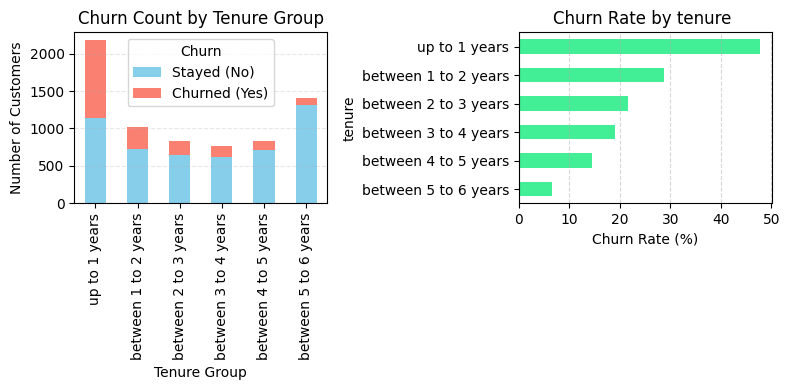

In [87]:
# ploting effect of tenure on churn

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# ----------- Chart 1: Raw Counts (Stacked Bar) -------------
grouped_tenure[['Stayed (No)', 'Churned (Yes)']].plot(
    kind='bar',
    stacked=True,
    color=['skyblue', 'salmon'],
    ax=ax[0]
)

ax[0].set_title("Churn Count by Tenure Group")
ax[0].set_ylabel("Number of Customers")
ax[0].set_xlabel("Tenure Group")
ax[0].legend(title='Churn')
ax[0].grid(axis='y', linestyle='--', alpha=0.3)

# ----------- Chart 2: Churn Rate (%) -----------------------
grouped_tenure['Churn Rate (%)'].sort_values().plot(
    kind='barh', 
    color=['#42ee96'], 
    figsize=(8, 4)
)

plt.title('Churn Rate by tenure ')
plt.xlabel('Churn Rate (%)')
plt.ylabel('tenure')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### 3. Monthly Charges vs Churn

 Charges Range : Churn Rate (%) 

 -------------     :     --------------  

+  0–40     :    11.7% ✅         

+  40–60    :    25.6% ⚠️         

+  60–80    :    32.5% 🔥          

+  80–100   :    37.0% 🚨         

In [88]:
df_monthlyCharges = df.copy()
grouped_monthlyCharges = df_monthlyCharges.groupby(['MonthlyCharges', 'Churn'], observed=False).size().unstack()
grouped_monthlyCharges['Churn Rate (%)'] = (grouped_monthlyCharges['Yes'] / (grouped_monthlyCharges['Yes'] + grouped_monthlyCharges['No'])) * 100
grouped_monthlyCharges['Churn Rate (%)'] = grouped_monthlyCharges['Churn Rate (%)'].round(1)
grouped_monthlyCharges.columns = ['Stayed (No)', 'Churned (Yes)', 'Churn Rate (%)']
grouped_monthlyCharges

,Stayed (No),Churned (Yes),Churn Rate (%)
MonthlyCharges,,,
between 0 to 40,1618,214,11.7
between 40 to 60,802,276,25.6
between 60 to 80,984,473,32.5
between 80 to 100,1110,653,37.0
between 100 to 120,649,253,28.0


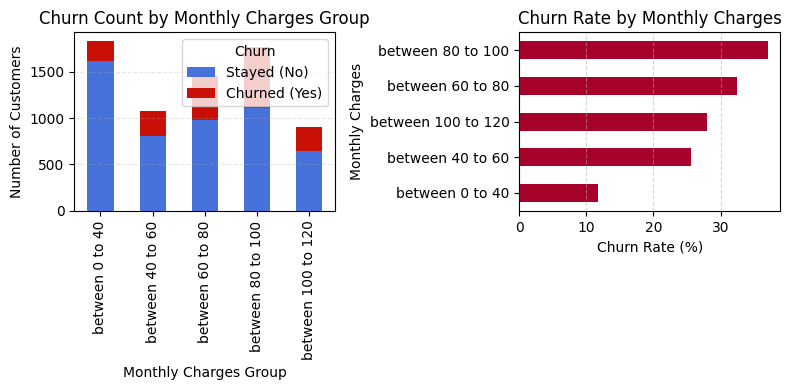

In [89]:
# ploting effect of monthly charges on churn

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# ----------- Chart 1: Raw Counts (Stacked Bar) -------------
grouped_monthlyCharges[['Stayed (No)', 'Churned (Yes)']].plot(
    kind='bar',
    stacked=True,
    color=['#4872db', '#c81006'],
    ax=ax[0]
)

ax[0].set_title("Churn Count by Monthly Charges Group")
ax[0].set_ylabel("Number of Customers")
ax[0].set_xlabel("Monthly Charges Group")
ax[0].legend(title='Churn')
ax[0].grid(axis='y', linestyle='--', alpha=0.3)

# ----------- Chart 2: Churn Rate (%) -----------------------
grouped_monthlyCharges['Churn Rate (%)'].sort_values().plot(
    kind='barh', 
    color=['#a7032a'], 
    figsize=(8, 4)
)

plt.title('Churn Rate by Monthly Charges')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Monthly Charges')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### 4. Contract Type vs Churn

+ Month-to-month: highest churn (42.7%)

+ Two year: lowest churn (~2.9%)

+ Customers with longer contracts churn much less

In [90]:
df_contract = df.copy()
grouped_contract = df_contract.groupby(['Contract', 'Churn']).size().unstack()
grouped_contract['Churn Rate (%)'] = (grouped_contract['Yes'] / (grouped_contract['Yes'] + grouped_contract['No'])) * 100
grouped_contract['Churn Rate (%)'] = grouped_contract['Churn Rate (%)'].round(1)
grouped_contract.columns = ['Stayed (No)', 'Churned (Yes)', 'Churn Rate (%)']
grouped_contract

,Stayed (No),Churned (Yes),Churn Rate (%)
Contract,,,
Month-to-month,2220,1655,42.7
One year,1306,166,11.3
Two year,1637,48,2.8


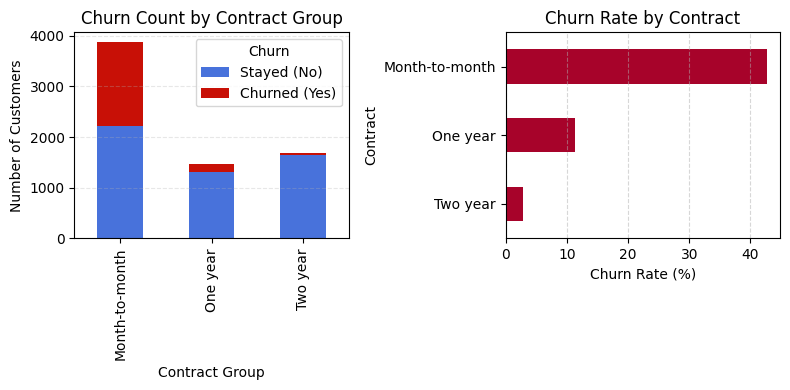

In [91]:
# ploting effect of contract on churn

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# ----------- Chart 1: Raw Counts (Stacked Bar) -------------
grouped_contract[['Stayed (No)', 'Churned (Yes)']].plot(
    kind='bar',
    stacked=True,
    color=['#4872db', '#c81006'],
    ax=ax[0]
)

ax[0].set_title("Churn Count by Contract Group")
ax[0].set_ylabel("Number of Customers")
ax[0].set_xlabel("Contract Group")
ax[0].legend(title='Churn')
ax[0].grid(axis='y', linestyle='--', alpha=0.3)

# ----------- Chart 2: Churn Rate (%) -----------------------
grouped_contract['Churn Rate (%)'].sort_values().plot(
    kind='barh', 
    color=['#a7032a'], 
    figsize=(8, 4)
)

plt.title('Churn Rate by Contract')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Contract')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### 5. Payment Method vs Churn

+ Electronic check: churn rate ~45% (highest)

+ Mailed check: churn rate ~ 19%

+ Bank transfer / Credit card (auto): ~15–17%

In [92]:
df_paymentMethod = df.copy()
grouped_paymentMethod = df_paymentMethod.groupby(['PaymentMethod', 'Churn']).size().unstack()
grouped_paymentMethod['Churn Rate (%)'] = (grouped_paymentMethod['Yes'] / (grouped_paymentMethod['Yes'] + grouped_paymentMethod['No'])) * 100
grouped_paymentMethod['Churn Rate (%)'] = grouped_paymentMethod['Churn Rate (%)'].round(1)
grouped_paymentMethod.columns = ['Stayed (No)', 'Churned (Yes)', 'Churn Rate (%)']
grouped_paymentMethod

,Stayed (No),Churned (Yes),Churn Rate (%)
PaymentMethod,,,
Bank transfer (automatic),1284,258,16.7
Credit card (automatic),1289,232,15.3
Electronic check,1294,1071,45.3
Mailed check,1296,308,19.2


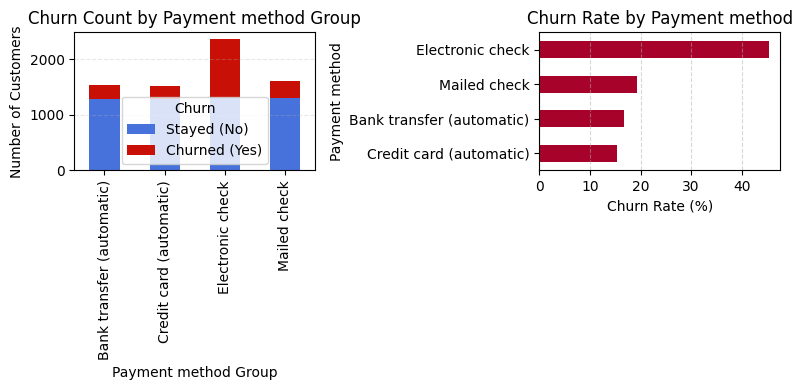

In [93]:
# ploting effect of Payment Method on churn

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# ----------- Chart 1: Raw Counts (Stacked Bar) -------------
grouped_paymentMethod[['Stayed (No)', 'Churned (Yes)']].plot(
    kind='bar',
    stacked=True,
    color=['#4872db', '#c81006'],
    ax=ax[0]
)

ax[0].set_title("Churn Count by Payment method Group")
ax[0].set_ylabel("Number of Customers")
ax[0].set_xlabel("Payment method Group")
ax[0].legend(title='Churn')
ax[0].grid(axis='y', linestyle='--', alpha=0.3)

# ----------- Chart 2: Churn Rate (%) -----------------------
grouped_paymentMethod['Churn Rate (%)'].sort_values().plot(
    kind='barh', 
    color=['#a7032a'], 
    figsize=(8, 4)
)

plt.title('Churn Rate by Payment method')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Payment method')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### 6. Internet Service vs Churn

Service  :  Churn Rate (%)

Fiber optic :	41.9% 🔥

DSL  :	19.0% ✅

No service  :	7.4% ✅✅



In [94]:
df_InternetService = df.copy()
grouped_InternetService = df_InternetService.groupby(['InternetService', 'Churn']).size().unstack()
grouped_InternetService['Churn Rate (%)'] = (grouped_InternetService['Yes'] / (grouped_InternetService['Yes'] + grouped_InternetService['No'])) * 100
grouped_InternetService['Churn Rate (%)'] = grouped_InternetService['Churn Rate (%)'].round(1)
grouped_InternetService.columns = ['Stayed (No)', 'Churned (Yes)', 'Churn Rate (%)']
grouped_InternetService

,Stayed (No),Churned (Yes),Churn Rate (%)
InternetService,,,
DSL,1957,459,19.0
Fiber optic,1799,1297,41.9
No,1407,113,7.4


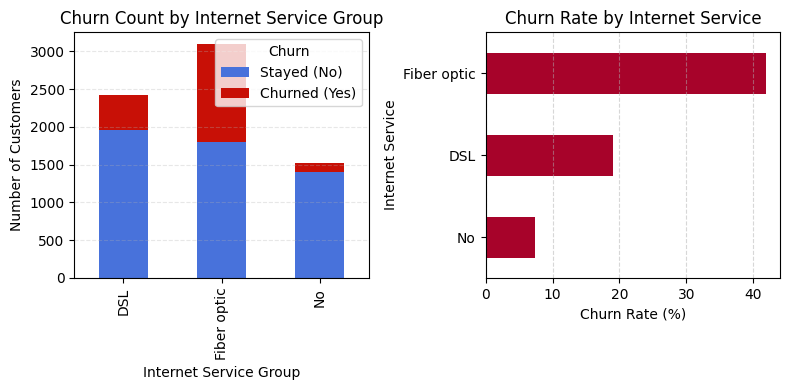

In [95]:
# ploting effect of Internet Service on churn

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# ----------- Chart 1: Raw Counts (Stacked Bar) -------------
grouped_InternetService[['Stayed (No)', 'Churned (Yes)']].plot(
    kind='bar',
    stacked=True,
    color=['#4872db', '#c81006'],
    ax=ax[0]
)

ax[0].set_title("Churn Count by Internet Service Group")
ax[0].set_ylabel("Number of Customers")
ax[0].set_xlabel("Internet Service Group")
ax[0].legend(title='Churn')
ax[0].grid(axis='y', linestyle='--', alpha=0.3)

# ----------- Chart 2: Churn Rate (%) -----------------------
grouped_InternetService['Churn Rate (%)'].sort_values().plot(
    kind='barh', 
    color=['#a7032a'], 
    figsize=(8, 4)
)

plt.title('Churn Rate by Internet Service')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Internet Service')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 🔍 Correlation Heatmap (Numeric Features)
+ tenure negatively correlated with churn (–0.35)

+ MonthlyCharges positively correlated (+0.20)

+ TotalCharges strongly related to tenure (+0.83)

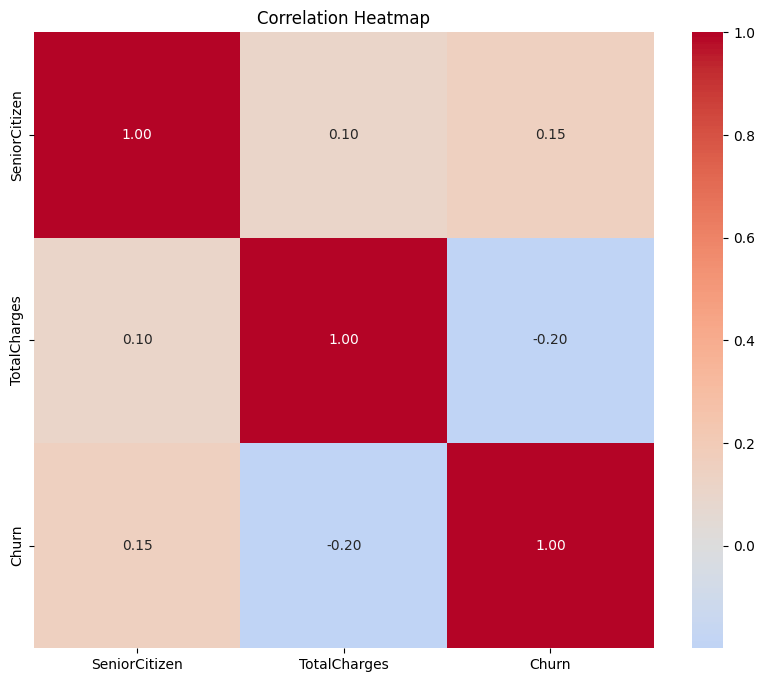

In [96]:
# Convert 'Churn' to numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### 🧠 Key Takeaways

+ Most churn happens in the first 12 months

+ Month-to-month contracts and electronic payments increase churn risk

+ High-paying customers churn more, especially those on fiber optic plans

+ Focus areas for retention:

    + First-year onboarding

    + Auto-payment incentives

    + Contract upgrades